In [21]:
import bidder_strategy as learning
import importlib
import losses as losses
import utils 
import torch
import matplotlib.pyplot as plt
importlib.reload(learning)
importlib.reload(losses)
importlib.reload(utils)
import numpy as np
import distributions

## Define the distribution 

We have implemented two distributions so far but it is very easy to define a new one 

In [4]:
distrib = distributions.UniformDistrib()
#distrib = distributions.ExponentialDistrib()

In [4]:
distrib.virtual_value

<function distributions.UniformDistrib.__init__.<locals>.<lambda>(x)>

## Learning to bid truthful when reserve price is fixed

We start with a simple example to check that the network recover the truthful bidding when the reserve price is fixed

In [ ]:
auction_type = 'lazy_second_price'
net = learning.Net_simple_neuron(init_a = 0.8)
loss_net = losses.LossReserveFixedLazySecondPrice(0.5,distrib,nb_opponents=1)
learning.main(net,loss_net,nb_steps=1500,size_batch=10000,lr = 0.01)
utils.compute_revenue(net,loss_eval,1000000,distrib,auction_type,nb_opponents=1)


## Learning optimal bidding strategies in lazy second price

#### Learning linear/affine shading with one neuron

Here we show how to learn an affine shading where the auction is a lazy second price auction with personalized reserve price

In [ ]:
net = learning.Net_simple_neuron(init_a = 1.0)
loss_net = losses.LossMonopolyReserveLazySecondPrice(distrib)
learning.main(net,loss_net,nb_steps=3000,size_batch=40000,lr = 0.001)

In [ ]:
auction_type = 'lazy_second_price'
utils.compute_revenue(net,loss_net,1000000,distrib,auction_type,nb_opponents=1)

#### Learning to bid in lazy second price auction with 200 neurons

In [ ]:
net = learning.Net_one_layer(size_layer = 200)
loss_train = losses.LossMonopolyReserveLazySecondPrice(distrib,nb_opponents=1)
learning.main(net,loss_train,nb_steps=1500,size_batch=40000,lr = 0.001)


In [ ]:
auction_type = 'lazy_second_price'
loss_eval = losses.LossReserveFixedLazySecondPrice(0.0,distrib,nb_opponents=1)
utils.sanity_check_second_price(net,loss_eval,1000000)
utils.compute_revenue(net,loss_train,1000000,distrib,auction_type,nb_opponents=1)


In [ ]:
nb_runs = 10
size_batch_eval = 1000000
nb_opponents = 1
loss_train = losses.LossMonopolyReserveLazySecondPrice(distrib,nb_opponents=nb_opponents)
loss_eval = losses.LossReserveFixedLazySecondPrice(0.0,distrib,nb_opponents=nb_opponents)
perf_summary = utils.run_multiple_runs_second_price(nb_runs,size_batch_eval,loss_train,loss_eval,distrib,
                    nb_opponents,auction_type='lazy_second_price',
                    nb_steps_learning=3000,size_batch_learning=20000,lr = 0.001)
perf_summary

In [ ]:
nb_opponents_list = [1,2,3]
nb_runs = 3
size_batch_eval = 1000000
for nb_opponents in nb_opponents_list:
    loss_train = losses.LossMonopolyReserveLazySecondPrice(distrib,nb_opponents=nb_opponents)
    loss_eval = losses.LossReserveFixedLazySecondPrice(0.0,distrib,nb_opponents=nb_opponents)
    perf_summary = utils.run_multiple_runs_second_price(nb_runs,size_batch_eval,loss_train,loss_eval,distrib,
                    nb_opponents,auction_type='lazy_second_price',
                    nb_steps_learning=1500,size_batch_learning=20000,lr = 0.001)
    print(f"nb_opponents:{nb_opponents}")
    print(f"perf_summary:{perf_summary}")

## Learning optimal bidding strategies in eager second price

In [ ]:
net = learning.Net_one_layer()
loss_net = losses.LossMonopolyReserveEagerSecondPrice(distrib,nb_opponents=3)
learning.main(net,loss_net,nb_steps=4000,size_batch=60000,lr = 0.0001)

In [ ]:
auction_type = 'eager_second_price'
loss_eval = losses.LossReserveFixedEagerSecondPrice(0.0,distrib,nb_opponents=3)
utils.sanity_check_second_price(net,loss_eval,1000000)
utils.compute_revenue(net,loss_net,1000000,distrib,auction_type,nb_opponents=1)


In [ ]:
nb_runs = 10
size_batch_eval = 1000000
nb_opponents = 1
loss_train = losses.LossMonopolyReserveEagerSecondPrice(distrib,nb_opponents=nb_opponents)
loss_eval = losses.LossReserveFixedEagerSecondPrice(0.0,distrib,nb_opponents=nb_opponents)
perf_summary = utils.run_multiple_runs_second_price(nb_runs,size_batch_eval,loss_train,loss_eval,distrib,
                    nb_opponents,auction_type='eager_second_price',
                    nb_steps_learning=3000,size_batch_learning=20000,lr = 0.001)
perf_summary

In [ ]:
nb_opponents_list = [1,2,3]
nb_runs = 5
size_batch_eval = 1000000
for nb_opponents in nb_opponents_list:
    loss_train = losses.LossMonopolyReserveEagerSecondPrice(distrib,nb_opponents=nb_opponents)
    loss_eval = losses.LossReserveFixedEagerSecondPrice(0.0,distrib,nb_opponents=nb_opponents)
    perf_summary = utils.run_multiple_runs_second_price(nb_runs,size_batch_eval,loss_train,loss_eval,distrib,
                    nb_opponents,auction_type='eager_second_price',
                    nb_steps_learning=1500,size_batch_learning=20000,lr = 0.0001)
    print(f"nb_opponents:{nb_opponents}")
    print(f"perf_summary:{perf_summary}")

## learning myerson in one strategic

In [ ]:
net = learning.Net_one_layer()
loss_net = losses.lossMyersonAuction(distrib,nb_opponents=3)
learning.main(net,loss_net,nb_steps=4000,size_batch=60000,lr = 0.0001)

In [ ]:
nb_runs = 10
loss_net = losses.lossMyersonAuction(distrib,nb_opponents=1)
size_batch_eval = 1000000
utils.run_multiple_runs_simple(nb_runs,loss_net,size_batch_eval,nb_steps_train=2000,size_batch_train=20000,lr = 0.0001)

In [ ]:
nb_opponents_list = [1,2,3]
nb_runs = 5
size_batch_eval = 1000000
for nb_opponents in nb_opponents_list:
    loss_net = losses.lossMyersonAuction(distrib,nb_opponents=nb_opponents)
    
    #perf_summary = utils.run_multiple_runs_simple(nb_runs,loss_net,size_batch_eval,nb_steps_train=2000,size_batch_train=20000,lr = 0.0001)
    perf_summary = utils.run_multiple_runs_second_price(nb_runs,size_batch_eval,loss_net,loss_net,distrib,
                    nb_opponents,auction_type='Myerson',
                    nb_steps_learning=1500,size_batch_learning=20000,lr = 0.0001)
    print(f"nb_opponents:{nb_opponents}")
    print(f"perf_summary:{perf_summary}")

## Boosted second price based on affine fit on the virtual value to compute the reserve price and design the auction 

In [ ]:
net = learning.Net_one_layer()
loss_net = losses.lossBoostedSecondPriceAffineFit(distrib,nb_opponents=1)
learning.main(net,loss_net,nb_steps=1000,size_batch=10000,lr = 0.1)

In [ ]:
nb_runs = 3
loss_net = losses.lossBoostedSecondPriceAffineFit(distrib,nb_opponents=1)
size_batch_eval = 1000000
utils.run_multiple_runs_simple(nb_runs,loss_net,size_batch_eval,nb_steps_train=2000,size_batch_train=20000,lr = 0.0001)

<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: 0.03586479276418686
loss after 100 iterations: 0.15344682335853577
loss after 200 iterations: 0.2087014615535736
loss after 300 iterations: 0.23542273044586182
loss after 400 iterations: 0.24196693301200867
loss after 500 iterations: 0.24403072893619537
loss after 600 iterations: 0.24566742777824402
loss after 700 iterations: 0.2458684742450714
loss after 800 iterations: 0.2467048019170761
loss after 900 iterations: 0.2455420345067978
loss after 1000 iterations: 0.2456771433353424
loss after 1100 iterations: 0.24624003469944
loss after 1200 iterations: 0.24468642473220825
loss after 1300 iterations: 0.24622264504432678
loss after 1400 iterations: 0.24552953243255615


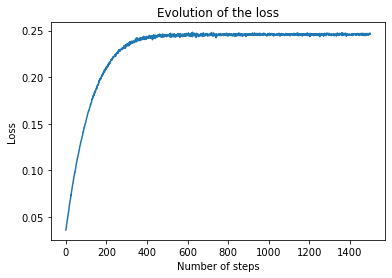

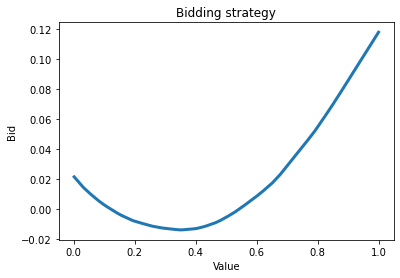

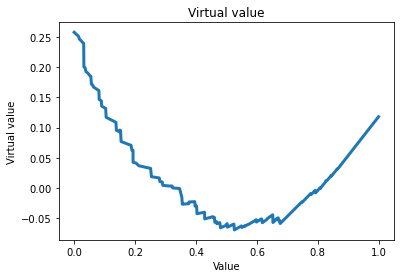

0.8097168
reserve_value:tensor([[0.8097]])
reserve price:tensor([[0.0578]], grad_fn=<AddmmBackward>))
perf:0.24613849818706512
0.8097168
reserve_value:tensor([[0.8097]])
reserve price:tensor([[0.0578]], grad_fn=<AddmmBackward>))
perf:0.24600809812545776
0.8097168
a:-0.18506133556365967
b:0.02579651214182377
payment :0.049872253090143204
revenue: 0.2997330117899211
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: 0.023761412128806114
loss after 100 iterations: 0.16122250258922577
loss after 200 iterations: 0.21799059212207794
loss after 300 iterations: 0.24065934121608734
loss after 400 iterations: 0.24558256566524506
loss after 500 iterations: 0.2471470832824707


In [ ]:
nb_opponents_list = [1,2,3]
nb_runs = 5
size_batch_eval = 1000000
for nb_opponents in nb_opponents_list:
    loss_net = losses.lossBoostedSecondPriceAffineFit(distrib,nb_opponents=nb_opponents)
    perf_summary = utils.run_multiple_runs_second_price(nb_runs,size_batch_eval,loss_net,loss_net,distrib,
                    nb_opponents,auction_type='boosted_second_price',
                    nb_steps_learning=1500,size_batch_learning=20000,lr = 0.0001)    
    
    print(f"nb_opponents:{nb_opponents}")
    print(f"perf_summary:{perf_summary}")

## Boosted second price based on linear fit on the virtual value to compute the reserve price and design the auction 

In [ ]:
net = learning.Net_one_layer()
loss_net = losses.lossBoostedSecondPriceAffineFit(distrib,nb_opponents=1)
learning.main(net,loss_net,nb_steps=1000,size_batch=10000,lr = 0.1)

In [ ]:
nb_runs = 3
loss_net = losses.lossBoostedSecondPriceAffineFit(distrib,nb_opponents=1)
size_batch_eval = 1000000
utils.run_multiple_runs_simple(nb_runs,loss_net,size_batch_eval,nb_steps_train=2000,size_batch_train=20000,lr = 0.0001)

<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: 0.0043364763259887695
loss after 100 iterations: 0.06815962493419647
loss after 200 iterations: 0.12029769271612167
loss after 300 iterations: 0.16405805945396423
loss after 400 iterations: 0.19211414456367493
loss after 500 iterations: 0.21450497210025787
loss after 600 iterations: 0.22126330435276031
loss after 700 iterations: 0.22235575318336487
loss after 800 iterations: 0.22685781121253967
loss after 900 iterations: 0.22783587872982025
loss after 1000 iterations: 0.22709763050079346
loss after 1100 iterations: 0.2288006842136383
loss after 1200 iterations: 0.2291059046983719
loss after 1300 iterations: 0.23099321126937866
loss after 1400 iterations: 0.23108844459056854


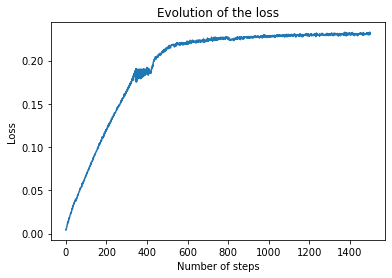

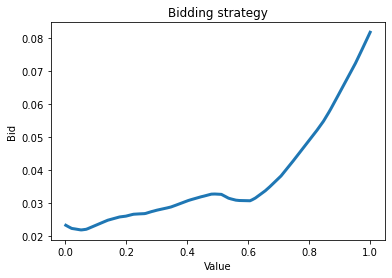

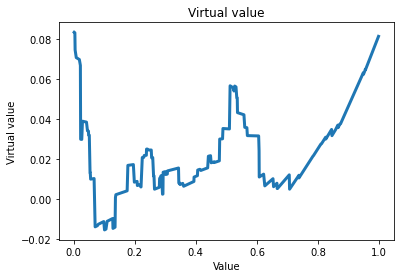

0.13575915
reserve_value:tensor([[0.1358]])
reserve price:tensor([[0.0247]], grad_fn=<AddmmBackward>))
perf:0.2310512661933899
0.13575915
reserve_value:tensor([[0.1358]])
reserve price:tensor([[0.0247]], grad_fn=<AddmmBackward>))
perf:0.23100028932094574
0.13575915
a:0.04309317469596863
b:0.02175883576273918
payment :0.010540023446083069
revenue: 0.26040673172882933
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: -0.04614695906639099
loss after 100 iterations: 0.05525654926896095
loss after 200 iterations: 0.1349237561225891
loss after 300 iterations: 0.20057576894760132
loss after 400 iterations: 0.21923653781414032
loss after 500 iterations: 0.23207330703735352
loss after 600 iterations: 0.22672733664512634
loss after 700 iterations: 0.230074942111969
loss after 800 iterations: 0.22863905131816864
loss after 900 iterations: 0.2288683950

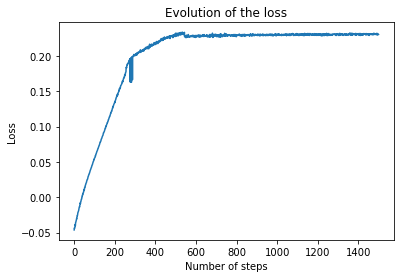

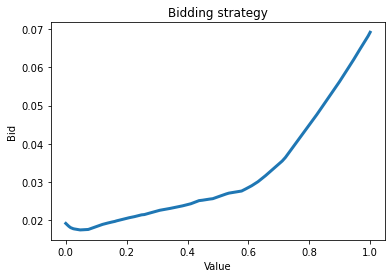

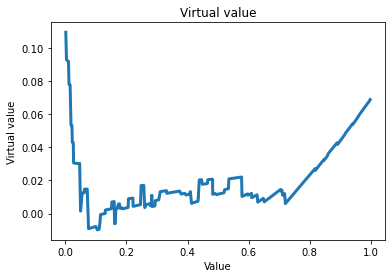

0.16452816
reserve_value:tensor([[0.1645]])
reserve price:tensor([[0.0198]], grad_fn=<AddmmBackward>))
perf:0.230605348944664
0.16452816
reserve_value:tensor([[0.1645]])
reserve price:tensor([[0.0198]], grad_fn=<AddmmBackward>))
perf:0.23030546307563782
0.16452816
a:0.06904719024896622
b:0.017013587057590485
payment :0.008259345777332783
revenue: 0.25843947433184666
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: -0.016191838309168816
loss after 100 iterations: 0.08699571341276169
loss after 200 iterations: 0.15400199592113495
loss after 300 iterations: 0.1816987693309784
loss after 400 iterations: 0.1868361085653305
loss after 500 iterations: 0.19241413474082947
loss after 600 iterations: 0.19745413959026337
loss after 700 iterations: 0.20169341564178467
loss after 800 iterations: 0.20407837629318237
loss after 900 iterations: 0.20423962

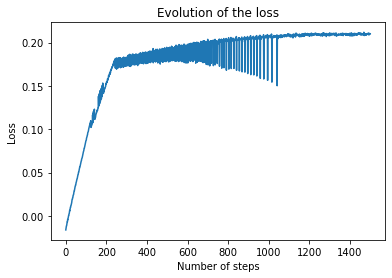

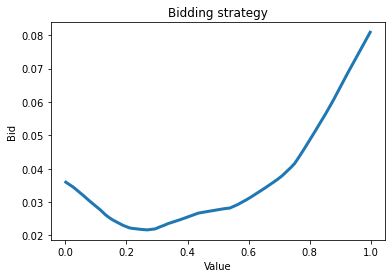

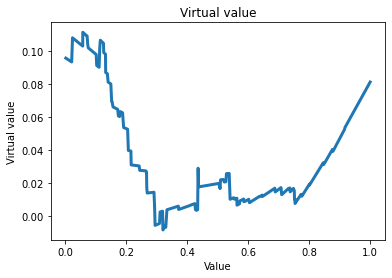

0.33277833
reserve_value:tensor([[0.3328]])
reserve price:tensor([[0.0234]], grad_fn=<AddmmBackward>))
perf:0.21004624664783478
0.33277833
reserve_value:tensor([[0.3328]])
reserve price:tensor([[0.0234]], grad_fn=<AddmmBackward>))
perf:0.20953397452831268
0.33277833
a:0.019206715747714043
b:0.03535768389701843
payment :0.007831746712327003
revenue: 0.2577065637376135
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: 0.005094415042549372
loss after 100 iterations: 0.07940923422574997
loss after 200 iterations: 0.12220237404108047
loss after 300 iterations: 0.1682857871055603
loss after 400 iterations: 0.18002790212631226
loss after 500 iterations: 0.1964099109172821
loss after 600 iterations: 0.21501676738262177
loss after 700 iterations: 0.22293443977832794
loss after 800 iterations: 0.2247987985610962
loss after 900 iterations: 0.227978512

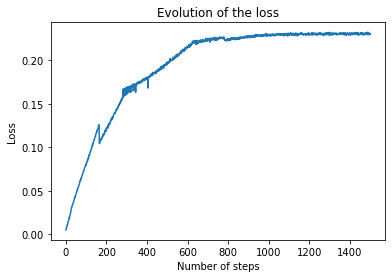

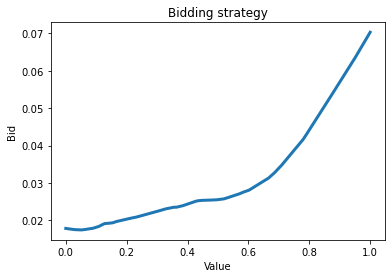

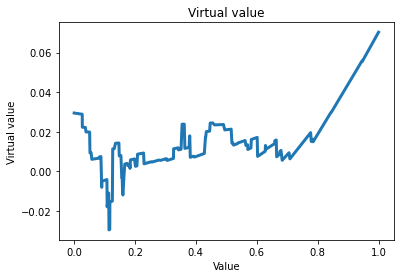

0.16517617
reserve_value:tensor([[0.1652]])
reserve price:tensor([[0.0196]], grad_fn=<AddmmBackward>))
perf:0.2306709587574005
0.16517617
reserve_value:tensor([[0.1652]])
reserve price:tensor([[0.0196]], grad_fn=<AddmmBackward>))
perf:0.23055636882781982
0.16517617
a:0.07118860632181168
b:0.01559680886566639
payment :0.008197118528187275
revenue: 0.2582160761610949
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: -0.03355412185192108
loss after 100 iterations: 0.0669557973742485
loss after 200 iterations: 0.11612332612276077
loss after 300 iterations: 0.1433369666337967
loss after 400 iterations: 0.16362841427326202
loss after 500 iterations: 0.16072547435760498
loss after 600 iterations: 0.19336116313934326
loss after 700 iterations: 0.1918538212776184
loss after 800 iterations: 0.2028723806142807
loss after 900 iterations: 0.207116469740

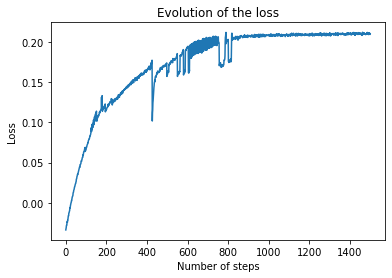

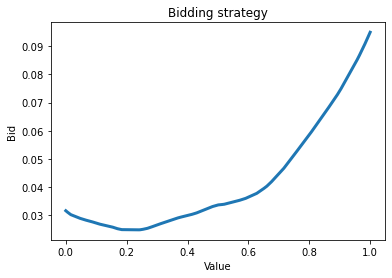

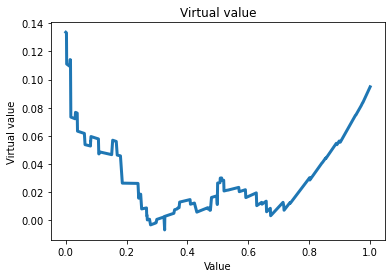

0.32548934
reserve_value:tensor([[0.3255]])
reserve price:tensor([[0.0276]], grad_fn=<AddmmBackward>))
perf:0.21014414727687836
0.32548934
reserve_value:tensor([[0.3255]])
reserve price:tensor([[0.0276]], grad_fn=<AddmmBackward>))
perf:0.20999528467655182
0.32548934
a:0.03457382693886757
b:0.030210020020604134
payment :0.00935970339924097
revenue: 0.2594201834538444
nb_opponents:1
perf_summary:{'mean_utility': 0.22227828, 'std_utility': 0.010220814, 'best_utility': 0.23100029, 'mean_revenue': 0.25883780588264577, 'std_revenue': 0.0009618333127914549, 'revenue_when_best_utility': 0.26040673172882933}
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: 0.007315125782042742
loss after 100 iterations: 0.02697940357029438
loss after 200 iterations: 0.04688884690403938
loss after 300 iterations: 0.06652606278657913
loss after 400 iterations: 0.0711

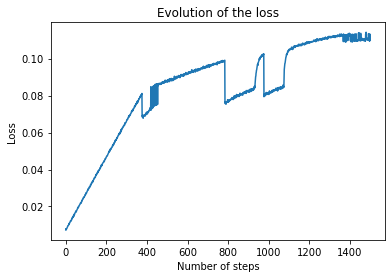

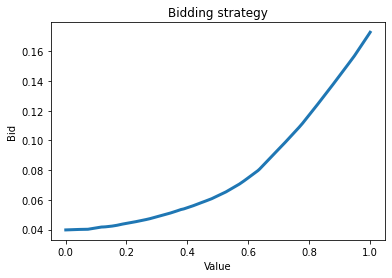

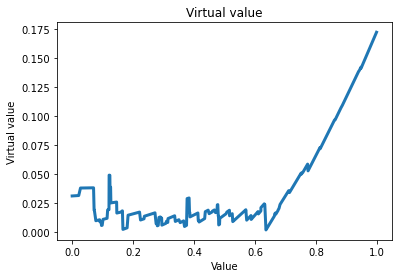

0.18141618
reserve_value:tensor([[0.1814]])
reserve price:tensor([[0.0435]], grad_fn=<AddmmBackward>))
perf:0.11046548932790756
0.18141618
reserve_value:tensor([[0.1814]])
reserve price:tensor([[0.0435]], grad_fn=<AddmmBackward>))
perf:0.11047337204217911
0.18141618
a:0.11661681532859802
b:0.030568521469831467
payment :0.009288965724408627
revenue: 0.4256888880470589
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: 0.0091995969414711
loss after 100 iterations: 0.02705743908882141
loss after 200 iterations: 0.042360853403806686
loss after 300 iterations: 0.05817823484539986
loss after 400 iterations: 0.07188282161951065
loss after 500 iterations: 0.08404065668582916
loss after 600 iterations: 0.06524869054555893
loss after 700 iterations: 0.09345680475234985
loss after 800 iterations: 0.09663540124893188
loss after 900 iterations: 0.0995029

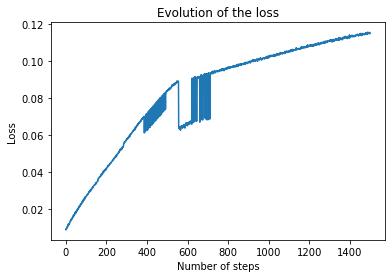

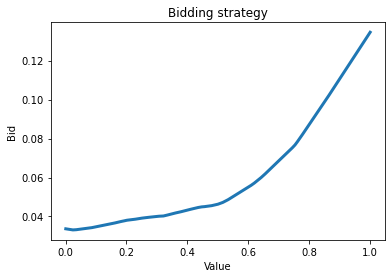

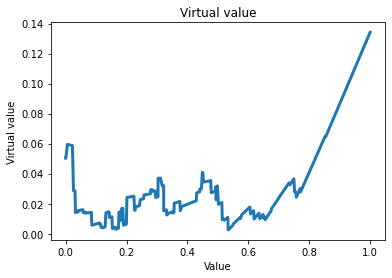

reserve_value:tensor([[0.]])
reserve price:0.033112507313489914)
perf:0.11548686027526855
reserve_value:tensor([[0.]])
reserve price:0.033112507313489914)
perf:0.11548265814781189
a:0.08228705823421478
b:0.028703831136226654
payment :0.00837775133550167
revenue: 0.4246069091974493
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: 0.003996368497610092
loss after 100 iterations: 0.025349043309688568
loss after 200 iterations: 0.04216881841421127
loss after 300 iterations: 0.045745849609375
loss after 400 iterations: 0.05349017679691315
loss after 500 iterations: 0.06175704672932625
loss after 600 iterations: 0.06806135177612305
loss after 700 iterations: 0.07478632777929306
loss after 800 iterations: 0.08108197897672653
loss after 900 iterations: 0.0880296528339386
loss after 1000 iterations: 0.09028438478708267
loss after 1100 iterations: 0.

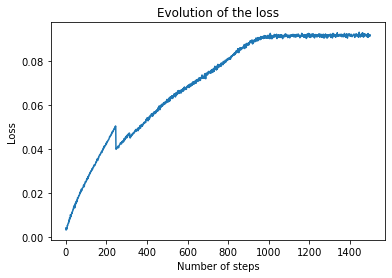

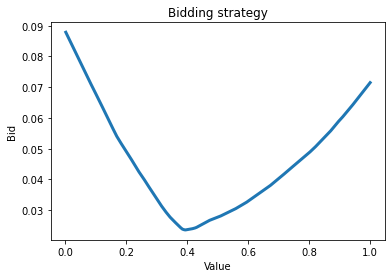

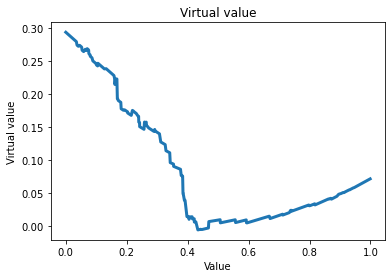

0.4691335
reserve_value:tensor([[0.4691]])
reserve price:tensor([[0.0265]], grad_fn=<AddmmBackward>))
perf:0.09174174070358276
0.4691335
reserve_value:tensor([[0.4691]])
reserve price:tensor([[0.0265]], grad_fn=<AddmmBackward>))
perf:0.09155548363924026
0.4691335
a:0.053736742585897446
b:0.08589661866426468
payment :0.0035538601223379374
revenue: 0.4177028841813319
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: 0.02234988659620285
loss after 100 iterations: 0.03554969280958176
loss after 200 iterations: 0.04869046434760094
loss after 300 iterations: 0.061787866055965424
loss after 400 iterations: 0.07438012212514877
loss after 500 iterations: 0.08570224046707153
loss after 600 iterations: 0.09168184548616409
loss after 700 iterations: 0.09622365236282349
loss after 800 iterations: 0.10038807988166809
loss after 900 iterations: 0.10505504

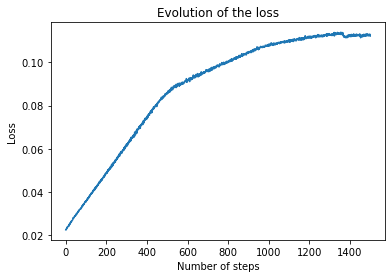

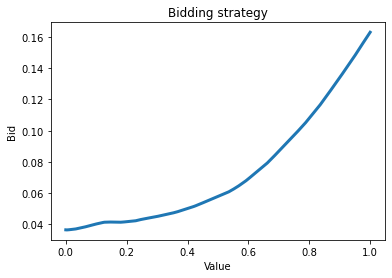

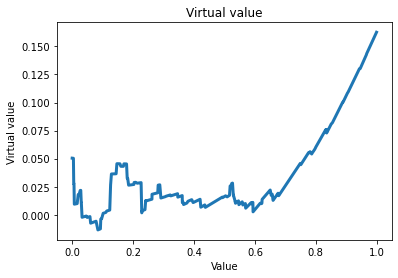

0.102159105
reserve_value:tensor([[0.1022]])
reserve price:tensor([[0.0403]], grad_fn=<AddmmBackward>))
perf:0.11280743032693863
0.102159105
reserve_value:tensor([[0.1022]])
reserve price:tensor([[0.0403]], grad_fn=<AddmmBackward>))
perf:0.11291968822479248
0.102159105
a:0.10697807371616364
b:0.028689373284578323
payment :0.009172443300485611
revenue: 0.4257089412221962
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: -0.004389271605759859
loss after 100 iterations: 0.014400661922991276
loss after 200 iterations: 0.0316401906311512
loss after 300 iterations: 0.04269510880112648
loss after 400 iterations: 0.05031989887356758
loss after 500 iterations: 0.07022889703512192
loss after 600 iterations: 0.0796351507306099
loss after 700 iterations: 0.0670890361070633
loss after 800 iterations: 0.07976728677749634
loss after 900 iterations: 0.0726

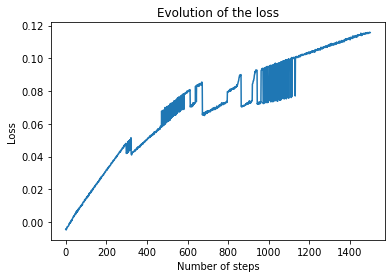

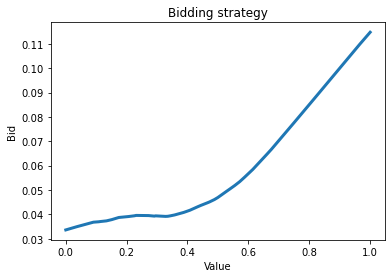

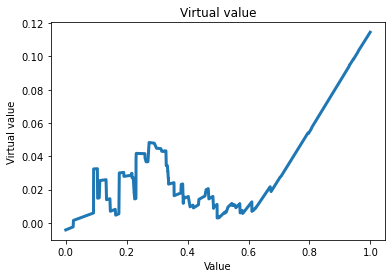

0.025468025
reserve_value:tensor([[0.0255]])
reserve price:tensor([[0.0345]], grad_fn=<AddmmBackward>))
perf:0.1158299669623375
0.025468025
reserve_value:tensor([[0.0255]])
reserve price:tensor([[0.0345]], grad_fn=<AddmmBackward>))
perf:0.11577378213405609
0.025468025
a:0.15753936767578125
b:0.02427595853805542
payment :0.008385633118450642
revenue: 0.4250668109706875
nb_opponents:2
perf_summary:{'mean_utility': 0.109240994, 'std_utility': 0.00904947, 'best_utility': 0.11577378, 'mean_revenue': 0.42375488672374473, 'std_revenue': 0.0030539322978836623, 'revenue_when_best_utility': 0.4250668109706875}
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: -0.0063378168269991875
loss after 100 iterations: 0.0015278980135917664
loss after 200 iterations: 0.006814049556851387
loss after 300 iterations: 0.011197474785149097
loss after 400 iterations:

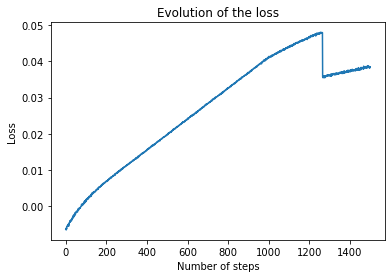

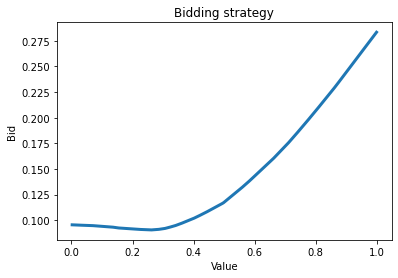

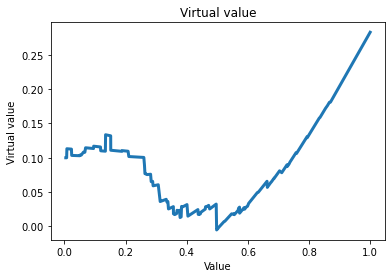

0.5080775
reserve_value:tensor([[0.5081]])
reserve price:tensor([[0.1195]], grad_fn=<AddmmBackward>))
perf:0.03867654502391815
0.5080775
reserve_value:tensor([[0.5081]])
reserve price:tensor([[0.1195]], grad_fn=<AddmmBackward>))
perf:0.038640741258859634
0.5080775
a:0.11109662055969238
b:0.07940515875816345
payment :0.007400121074169874
revenue: 0.5369988748323402
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: -0.028706414625048637
loss after 100 iterations: -0.004791963845491409
loss after 200 iterations: 0.0055439770221710205
loss after 300 iterations: 0.011467838659882545
loss after 400 iterations: 0.016430627554655075
loss after 500 iterations: 0.020814625546336174
loss after 600 iterations: 0.025159373879432678
loss after 700 iterations: 0.02957279607653618
loss after 800 iterations: 0.029300246387720108
loss after 900 iterations: 0

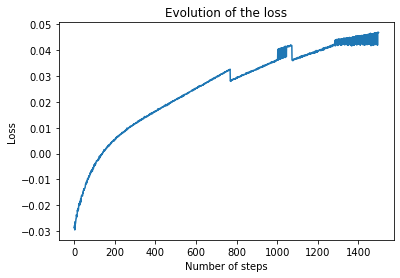

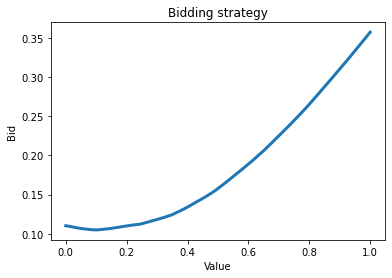

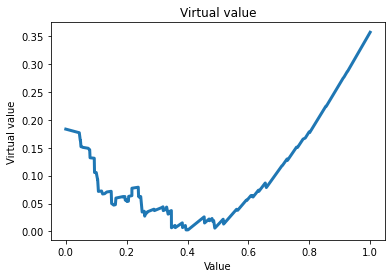

0.3953394
reserve_value:tensor([[0.3953]])
reserve price:tensor([[0.1329]], grad_fn=<AddmmBackward>))
perf:0.042216818779706955
0.3953394
reserve_value:tensor([[0.3953]])
reserve price:tensor([[0.1329]], grad_fn=<AddmmBackward>))
perf:0.04217242822051048
0.3953394
a:0.1685655117034912
b:0.0791405513882637
payment :0.010283488780260086
revenue: 0.5389253959167464
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: -0.010582029819488525
loss after 100 iterations: 0.002579191466793418
loss after 200 iterations: 0.009981111623346806
loss after 300 iterations: 0.015232834964990616
loss after 400 iterations: 0.020096514374017715
loss after 500 iterations: 0.025277700275182724
loss after 600 iterations: 0.030141377821564674
loss after 700 iterations: 0.03475542366504669
loss after 800 iterations: 0.03998652845621109
loss after 900 iterations: 0.0347

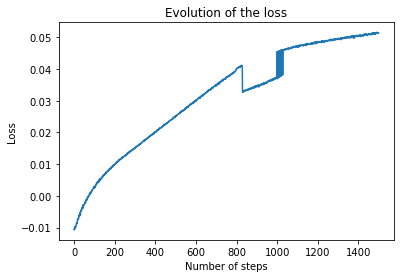

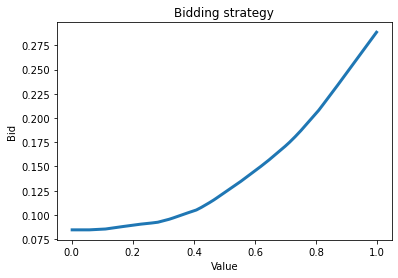

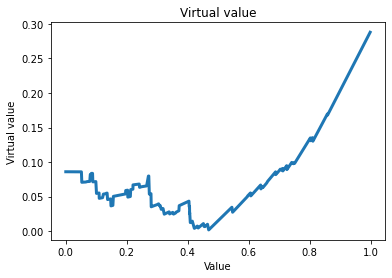

reserve_value:tensor([[0.]])
reserve price:0.08456581830978394)
perf:0.05144667252898216
reserve_value:tensor([[0.]])
reserve price:0.08456581830978394)
perf:0.05142570286989212
a:0.14287103712558746
b:0.06393217295408249
payment :0.010460003279149532
revenue: 0.5402238467438686
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: 0.005689360201358795
loss after 100 iterations: 0.010931113734841347
loss after 200 iterations: 0.014451464638113976
loss after 300 iterations: 0.018065307289361954
loss after 400 iterations: 0.021331248804926872
loss after 500 iterations: 0.024945275858044624
loss after 600 iterations: 0.02825709991157055
loss after 700 iterations: 0.031257517635822296
loss after 800 iterations: 0.03405173495411873
loss after 900 iterations: 0.03636086359620094
loss after 1000 iterations: 0.03901403024792671
loss after 1100 iteratio

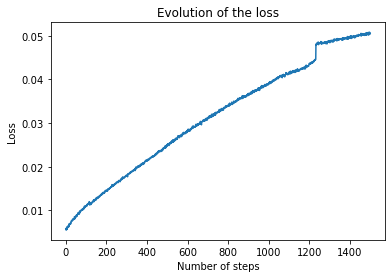

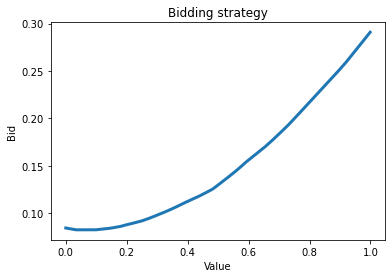

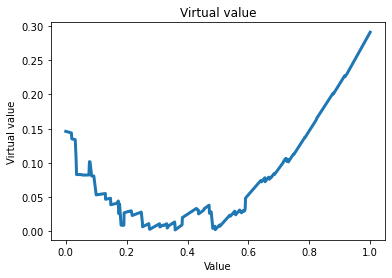

reserve_value:tensor([[0.]])
reserve price:0.08248771727085114)
perf:0.050684116780757904
reserve_value:tensor([[0.]])
reserve price:0.08248771727085114)
perf:0.05063847824931145
a:0.20241530239582062
b:0.05407603830099106
payment :0.01041958387941122
revenue: 0.5403217335373595
<bound method Module.parameters of Net_one_layer(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)>
loss after 0 iterations: -0.022570878267288208
loss after 100 iterations: -0.0021795607171952724
loss after 200 iterations: 0.006474300287663937
loss after 300 iterations: 0.01164557971060276
loss after 400 iterations: 0.016671713441610336
loss after 500 iterations: 0.021519826725125313
loss after 600 iterations: 0.026354793459177017
loss after 700 iterations: 0.03137391060590744
loss after 800 iterations: 0.036041274666786194
loss after 900 iterations: 0.04048168286681175
loss after 1000 iterations: 0.03195423632860184
loss after 1100 itera

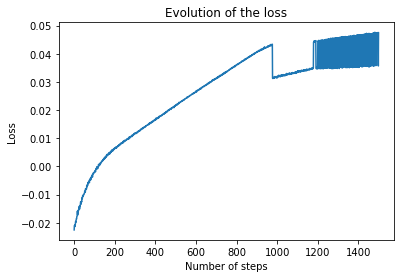

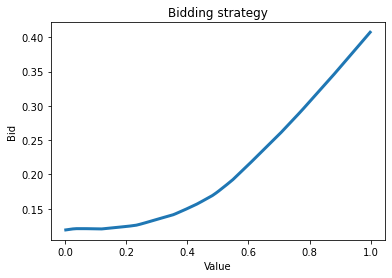

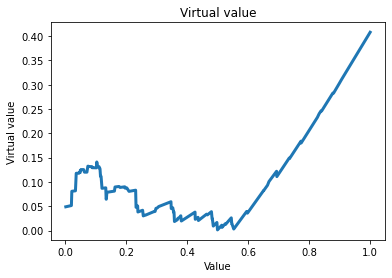

reserve_value:tensor([[0.]])
reserve price:0.11883531510829926)
perf:0.04734121263027191
reserve_value:tensor([[0.]])
reserve price:0.11883531510829926)
perf:0.04734845086932182
a:0.18984565138816833
b:0.07901597023010254
payment :0.014802301302552223
revenue: 0.5431374761620329
nb_opponents:3
perf_summary:{'mean_utility': 0.04604516, 'std_utility': 0.00493094, 'best_utility': 0.051425703, 'mean_revenue': 0.5399214654384694, 'std_revenue': 0.0020063929984955333, 'revenue_when_best_utility': 0.5402238467438686}


In [22]:
nb_opponents_list = [1,2,3]
nb_runs = 5
size_batch_eval = 1000000
for nb_opponents in nb_opponents_list:
    loss_net = losses.lossBoostedSecondPriceLinearFit(distrib,nb_opponents=nb_opponents)
    perf_summary = utils.run_multiple_runs_second_price(nb_runs,size_batch_eval,loss_net,loss_net,distrib,
                    nb_opponents,auction_type='boosted_second_price',
                    nb_steps_learning=1500,size_batch_learning=20000,lr = 0.0001)    
    
    print(f"nb_opponents:{nb_opponents}")
    print(f"perf_summary:{perf_summary}")